In [1]:
import os, time, math, csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
pd.options.display.float_format = '{:.2f}'.format

C:\Users\Shaoxuan\anaconda3\lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#STATIC PARAMETERS (DO NOT TOUCH)
data_path=os.getcwd()+"\\data"
trainingProp=0.80

batch_size=32 #Batch size
hidden_layers=[(24,"tanh"),(12,"tanh")] # Number and type of hidden layers
loss_function='mean_squared_error' #loss function for training
optimizer='RMSprop' #training optimizer
early_stopping="loss" #early stopping criteria
patience=50 #Number of epochs without improving loss
n_epochs=5000 #Number of epochs (at least 5000)
y_name="total_UL_traffic metro" #Response variable (what we want to predict)

#TUNABLE PARAMETERS
#awDataFile="metro_flexible_25_25_3" #ANT!!!!!!!!! Do not put ".csv" extension when writting the name
rawDataFile="Scenario_s100_l80_flexible_summary"
w=20 # Number of previous measurements of the response variable
x_names=["general_active antennas","total_slicing_0_capacity","total_slicing_1_capacity", "total_slicing_2_capacity","total_UL_traffic metro","total_slicing_0_CU","total_slicing_1_CU","total_slicing_2_CU","total_slicing_0_DU","total_slicing_1_DU","total_slicing_2_DU"] # RAN variables that we want to include in the model
#x_names=[] #This is the configuration for model 1 (no RAN variables)

In [3]:
DF_raw=pd.read_csv(data_path+'\\'+rawDataFile+".csv", sep=";")
nrow,ncol = DF_raw.shape

In [4]:
header=["y"]+["y_"+str(i+1) for i in range(w)]+x_names
data_proc=[]
for i in range(w,nrow):
    this_row=[]
    this_row.append(DF_raw[y_name][i])
    aux=list(DF_raw[y_name][(i-w):i])
    aux.reverse()
    this_row+=aux
    if len(x_names)>0:
        this_row+=list(DF_raw.iloc[i,:][x_names])
    data_proc.append(this_row)
DF_proc=pd.DataFrame(data_proc)
DF_proc.columns=header

In [5]:
nrow,ncol = DF_proc.shape
#R=np.random.permutation(nrow)
#trainingProp=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

R=list(range(nrow))
nt=math.ceil(nrow*trainingProp*0.1)
rows_training=R[0:nt]
rows_testing=R[(nt):(nrow+1)]

DF_training=DF_proc.iloc[rows_training,:]
DF_testing=DF_proc.iloc[rows_testing,:]


In [6]:
Y=DF_training.iloc[:,0].to_numpy().reshape(-1,1)
X=DF_training.iloc[:,1:ncol]

sc_input = MinMaxScaler()
sc_output = MinMaxScaler()
X_train = sc_input.fit_transform(X)
Y_train = sc_output.fit_transform(Y)


In [7]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Flatten
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping

def ann():
    model = Sequential()
    for i in range(len(hidden_layers)):
        if i==0:
            model.add(Dense(hidden_layers[i][0], input_dim = ncol-1, activation = hidden_layers[i][1]))
        else:
            model.add(Dense(hidden_layers[i][0],activation=hidden_layers[i][1]))
    model.add(Dense(1))
    model.compile(loss =loss_function ,optimizer = optimizer)
    return model


model_ann = KerasRegressor(build_fn=ann,epochs=n_epochs,batch_size=batch_size)

start_time = time.time()
callback = EarlyStopping(monitor=early_stopping, patience=patience)
model_ann.fit(X_train, Y_train, callbacks=[callback])
time_train_ann = time.time() - start_time

C:\Users\Shaoxuan\AppData\Local\Temp\ipykernel_14296\1142844184.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_ann = KerasRegressor(build_fn=ann,epochs=n_epochs,batch_size=batch_size)


Epoch 1/5000
33/33 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 2/5000
33/33 [==============================] - 0s 997us/step - loss: 0.0113
Epoch 3/5000
33/33 [==============================] - 0s 966us/step - loss: 0.0076
Epoch 4/5000
33/33 [==============================] - 0s 904us/step - loss: 0.0050
Epoch 5/5000
33/33 [==============================] - 0s 841us/step - loss: 0.0044
Epoch 6/5000
33/33 [==============================] - 0s 873us/step - loss: 0.0034
Epoch 7/5000
33/33 [==============================] - 0s 842us/step - loss: 0.0025
Epoch 8/5000
33/33 [==============================] - 0s 935us/step - loss: 0.0028
Epoch 9/5000
33/33 [==============================] - 0s 842us/step - loss: 0.0022
Epoch 10/5000
33/33 [==============================] - 0s 780us/step - loss: 0.0023
Epoch 11/5000
33/33 [==============================] - 0s 778us/step - loss: 0.0021
Epoch 12/5000
33/33 [==============================] - 0s 779us/step - loss: 0.0016
Epo

33/33 [==============================] - 0s 872us/step - loss: 4.3528e-04
Epoch 96/5000
33/33 [==============================] - 0s 841us/step - loss: 4.5660e-04
Epoch 97/5000
33/33 [==============================] - 0s 809us/step - loss: 3.5403e-04
Epoch 98/5000
33/33 [==============================] - 0s 811us/step - loss: 5.0317e-04
Epoch 99/5000
33/33 [==============================] - 0s 810us/step - loss: 4.7355e-04
Epoch 100/5000
33/33 [==============================] - 0s 809us/step - loss: 4.4723e-04
Epoch 101/5000
33/33 [==============================] - 0s 874us/step - loss: 4.5715e-04
Epoch 102/5000
33/33 [==============================] - 0s 842us/step - loss: 4.4072e-04
Epoch 103/5000
33/33 [==============================] - 0s 779us/step - loss: 4.3700e-04
Epoch 104/5000
33/33 [==============================] - 0s 779us/step - loss: 4.7904e-04
Epoch 105/5000
33/33 [==============================] - 0s 780us/step - loss: 4.4101e-04
Epoch 106/5000
33/33 [==================

33/33 [==============================] - 0s 842us/step - loss: 2.9021e-04
Epoch 188/5000
33/33 [==============================] - 0s 811us/step - loss: 3.0387e-04
Epoch 189/5000
33/33 [==============================] - 0s 873us/step - loss: 3.1449e-04
Epoch 190/5000
33/33 [==============================] - 0s 810us/step - loss: 3.2438e-04
Epoch 191/5000
33/33 [==============================] - 0s 809us/step - loss: 2.5621e-04
Epoch 192/5000
33/33 [==============================] - 0s 810us/step - loss: 3.2747e-04
Epoch 193/5000
33/33 [==============================] - 0s 842us/step - loss: 2.9446e-04
Epoch 194/5000
33/33 [==============================] - 0s 810us/step - loss: 3.2146e-04
Epoch 195/5000
33/33 [==============================] - 0s 778us/step - loss: 3.5391e-04
Epoch 196/5000
33/33 [==============================] - 0s 810us/step - loss: 3.0866e-04
Epoch 197/5000
33/33 [==============================] - 0s 872us/step - loss: 2.8106e-04
Epoch 198/5000
33/33 [==============

33/33 [==============================] - 0s 780us/step - loss: 2.3824e-04
Epoch 280/5000
33/33 [==============================] - 0s 810us/step - loss: 2.4104e-04
Epoch 281/5000
33/33 [==============================] - 0s 811us/step - loss: 2.5005e-04
Epoch 282/5000
33/33 [==============================] - 0s 780us/step - loss: 2.4456e-04
Epoch 283/5000
33/33 [==============================] - 0s 842us/step - loss: 2.3959e-04
Epoch 284/5000
33/33 [==============================] - 0s 810us/step - loss: 2.5909e-04
Epoch 285/5000
33/33 [==============================] - 0s 811us/step - loss: 2.3057e-04
Epoch 286/5000
33/33 [==============================] - 0s 748us/step - loss: 2.6523e-04
Epoch 287/5000
33/33 [==============================] - 0s 779us/step - loss: 1.5974e-04
Epoch 288/5000
33/33 [==============================] - 0s 810us/step - loss: 2.5697e-04
Epoch 289/5000
33/33 [==============================] - 0s 904us/step - loss: 2.5052e-04
Epoch 290/5000
33/33 [==============

In [8]:
Y=DF_testing.iloc[:,0].to_numpy().reshape(-1,1)
X=DF_testing.iloc[:,1:ncol]
X_test = sc_input.transform(X)
Y_test = sc_output.transform(Y)

372/372 [==============================] - 0s 637us/step


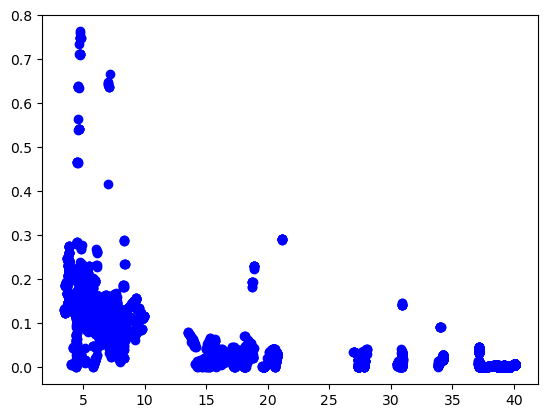

In [9]:
start_time = time.time()
Y_test_pred=model_ann.predict(X_test)
time_eval_ann=time.time()-start_time

real=list(list(zip(*Y_test))[0])
pred=list(Y_test_pred)

dist_min=sc_output.data_min_[0]
dist_max=sc_output.data_max_[0]

real_abs=np.add(dist_min,np.multiply((dist_max-dist_min),real))
pred_abs=np.add(dist_min,np.multiply((dist_max-dist_min),pred))

error=np.divide(np.abs(np.subtract(np.array(real_abs),np.array(pred_abs))),np.array(real_abs))

segment="access" if "access" in y_name else "metro"
model="M1" if len(x_names)==0 else "M2"

resultsFileName=os.getcwd()+"\\results\\"+rawDataFile+"_results["+segment+"_"+model+"_w"+str(w)+"].csv"
plotFileName=os.getcwd()+"\\results\\"+rawDataFile+"_results["+segment+"_"+model+"_w"+str(w)+"].png"
res=pd.DataFrame({"real":real_abs,"pred":pred_abs,"error":error})
res.to_csv(resultsFileName, header=True, index=False)

fig=plt.figure()
plt.plot(real_abs,error,'bo')
plt.show()
fig.savefig(plotFileName)